<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#형태소-분석---POS-Taggers" data-toc-modified-id="형태소-분석---POS-Taggers-1">형태소 분석 - POS Taggers</a></span><ul class="toc-item"><li><span><a href="#품사-분석기-:-nltk.pos_tag()" data-toc-modified-id="품사-분석기-:-nltk.pos_tag()-1.1">품사 분석기 : nltk.pos_tag()</a></span></li><li><span><a href="#Tag-Sets" data-toc-modified-id="Tag-Sets-1.2">Tag Sets</a></span></li><li><span><a href="#untag" data-toc-modified-id="untag-1.3">untag</a></span></li><li><span><a href="#FreqDist()" data-toc-modified-id="FreqDist()-1.4">FreqDist()</a></span></li><li><span><a href="#gutenberg(대량의-말뭉치)로-POS-tagging" data-toc-modified-id="gutenberg(대량의-말뭉치)로-POS-tagging-1.5">gutenberg(대량의 말뭉치)로 POS tagging</a></span></li><li><span><a href="#한글-POS-Tagging" data-toc-modified-id="한글-POS-Tagging-1.6">한글 POS Tagging</a></span></li><li><span><a href="#한글-형태소-분석기-성능-비교" data-toc-modified-id="한글-형태소-분석기-성능-비교-1.7">한글 형태소 분석기 성능 비교</a></span></li><li><span><a href="#국립국어원-세종21-:-말뭉치-검색-기능" data-toc-modified-id="국립국어원-세종21-:-말뭉치-검색-기능-1.8">국립국어원 세종21 : 말뭉치 검색 기능</a></span></li><li><span><a href="#naver-뉴스-기사-POS-tagging" data-toc-modified-id="naver-뉴스-기사-POS-tagging-1.9">naver 뉴스 기사 POS tagging</a></span></li><li><span><a href="#한글-POS-taggers-비교" data-toc-modified-id="한글-POS-taggers-비교-1.10">한글 POS taggers 비교</a></span></li></ul></li><li><span><a href="#Collocations" data-toc-modified-id="Collocations-2">Collocations</a></span></li></ul></div>

## 형태소 분석 - POS Taggers

- "She sells seashells on the seashore."

![POS_Tagging](./images/POS_Tagging.png)

- 많은 형태소 분석기, 품사 Taggers 중에 적합한 것을 선택해야 함

In [44]:
from nltk.tokenize import word_tokenize

In [45]:
sentence = "She sells seashells on the seashore."
tokens = word_tokenize(sentence)

In [46]:
tokens

['She', 'sells', 'seashells', 'on', 'the', 'seashore', '.']

### 품사 분석기 : nltk.pos_tag()

In [47]:
import nltk
# nltk.download('averaged_perceptron_tagger')

In [48]:
from nltk import pos_tag   # 형태소 분석기(품사 분석기) : tag set을 내장하고 있음

In [49]:
pos_tag(tokens)

[('She', 'PRP'),
 ('sells', 'VBZ'),
 ('seashells', 'NNS'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('seashore', 'NN'),
 ('.', '.')]

In [50]:
import re

In [51]:
pattern = re.compile(r"[{0}]".format(re.escape(punctuation)))
pattern.sub("", sentence)   # 구두점 제거됨

'She sells seashells on the seashore'

In [52]:
result = []

for token in tokens:
    if pattern.search(token):
        print("escape:", token)
    else:
        result.append(token.lower())

print(result)

escape: .
['she', 'sells', 'seashells', 'on', 'the', 'seashore']


In [53]:
pos_tag(result)

[('she', 'PRP'),
 ('sells', 'VBZ'),
 ('seashells', 'NNS'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('seashore', 'NN')]

### Tag Sets

In [54]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /Users/alex/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [55]:
from nltk.help import brown_tagset, upenn_tagset

In [56]:
upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [57]:
brown_tagset()

(: opening parenthesis
    (
): closing parenthesis
    )
*: negator
    not n't
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ? ; ! :
:: colon
    :
ABL: determiner/pronoun, pre-qualifier
    quite such rather
ABN: determiner/pronoun, pre-quantifier
    all half many nary
ABX: determiner/pronoun, double conjunction or pre-quantifier
    both
AP: determiner/pronoun, post-determiner
    many other next more last former little several enough most least only
    very few fewer past same Last latter less single plenty 'nough lesser
    certain various manye next-to-last particular final previous present
    nuf
AP$: determiner/pronoun, post-determiner, genitive
    other's
AP+AP: determiner/pronoun, post-determiner, hyphenated pair
    many-much
AT: article
    the an no a every th' ever' ye
BE: verb 'to be', infinitive or imperative
    be
BED: verb 'to be', past tense, 2nd person singular or all persons plural
    were
BED*: verb 'to be', past tense, 2nd person singular or 

In [58]:
brown_tagset("N.*")   # 패턴을 지정해서 특정한 태그만 검색해볼 수 있음

NN: noun, singular, common
    failure burden court fire appointment awarding compensation Mayor
    interim committee fact effect airport management surveillance jail
    doctor intern extern night weekend duty legislation Tax Office ...
NN$: noun, singular, common, genitive
    season's world's player's night's chapter's golf's football's
    baseball's club's U.'s coach's bride's bridegroom's board's county's
    firm's company's superintendent's mob's Navy's ...
NN+BEZ: noun, singular, common + verb 'to be', present tense, 3rd person singular
    water's camera's sky's kid's Pa's heat's throat's father's money's
    undersecretary's granite's level's wife's fat's Knife's fire's name's
    hell's leg's sun's roulette's cane's guy's kind's baseball's ...
NN+HVD: noun, singular, common + verb 'to have', past tense
    Pa'd
NN+HVZ: noun, singular, common + verb 'to have', present tense, 3rd person singular
    guy's Knife's boat's summer's rain's company's
NN+IN: noun, singular, common

- tag set 마다 품사의 의미를 다르게 표현함

In [59]:
pos_tag(result, "brown_tagset")    # 태스 셋을 지정할 수 있음(지정하지 않은 경우와 다르게 나타남)

[('she', 'UNK'),
 ('sells', 'UNK'),
 ('seashells', 'UNK'),
 ('on', 'UNK'),
 ('the', 'UNK'),
 ('seashore', 'UNK')]

In [60]:
pos_tag(result, "upenn_tagset")

[('she', 'UNK'),
 ('sells', 'UNK'),
 ('seashells', 'UNK'),
 ('on', 'UNK'),
 ('the', 'UNK'),
 ('seashore', 'UNK')]

In [61]:
tags = []
for term in pos_tag(result):
    if term[1] in ["IN", "DT"]:    # IN: preposition or conjunction, subordinating,  DT: determiner
        print("skipped:", term[0])
    else:
        print(term[0])
        tags.append(term[0].lower())
        
print(tags)

she
sells
seashells
skipped: on
skipped: the
seashore
['she', 'sells', 'seashells', 'seashore']


### untag

In [62]:
from nltk import untag

In [63]:
sentence = "The little yellow dog barked at the Persian cat."

pattern = re.compile(r"[{0}]".format(re.escape(punctuation)))
pattern.sub("", sentence)   # 구두점 제거됨

tokens = word_tokenize(sentence)

result = []

for token in tokens:
    if pattern.search(token):
        print("escape:", token)
    else:
        result.append(token.lower())

print(result)

escape: .
['the', 'little', 'yellow', 'dog', 'barked', 'at', 'the', 'persian', 'cat']


In [64]:
tagged = pos_tag(result)

In [65]:
tagged

[('the', 'DT'),
 ('little', 'JJ'),
 ('yellow', 'JJ'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('persian', 'JJ'),
 ('cat', 'NN')]

In [66]:
untag(tagged)
#[tag[0] for tag in tagged]

['the', 'little', 'yellow', 'dog', 'barked', 'at', 'the', 'persian', 'cat']

### FreqDist()

- tag set을 dictionary 형태로 처리

In [67]:
from nltk import Text

In [68]:
tagged, ["/".join(tag) for tag in tagged]

([('the', 'DT'),
  ('little', 'JJ'),
  ('yellow', 'JJ'),
  ('dog', 'NN'),
  ('barked', 'VBD'),
  ('at', 'IN'),
  ('the', 'DT'),
  ('persian', 'JJ'),
  ('cat', 'NN')],
 ['the/DT',
  'little/JJ',
  'yellow/JJ',
  'dog/NN',
  'barked/VBD',
  'at/IN',
  'the/DT',
  'persian/JJ',
  'cat/NN'])

In [69]:
textObj = Text(tagged)
textObj.vocab()

FreqDist({('the', 'DT'): 2, ('little', 'JJ'): 1, ('yellow', 'JJ'): 1, ('dog', 'NN'): 1, ('barked', 'VBD'): 1, ('at', 'IN'): 1, ('persian', 'JJ'): 1, ('cat', 'NN'): 1})

In [70]:
textObj.vocab().keys()

dict_keys([('the', 'DT'), ('little', 'JJ'), ('yellow', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('persian', 'JJ'), ('cat', 'NN')])

In [71]:
textObj.vocab().N(), textObj.vocab().freq(('the', 'DT'))

(9, 0.2222222222222222)

In [72]:
# 고빈도 단어 skip
for key in textObj.vocab().keys():
    if textObj.vocab().freq(key) > 0.2:    # frequency는 비율
        print("skipped:", key)

skipped: ('the', 'DT')


In [73]:
type(textObj.vocab())

nltk.probability.FreqDist

In [74]:
from nltk.probability import FreqDist   # 단어 빈도 관련 기능

In [75]:
taggedTerms = FreqDist()

for key in textObj.vocab().keys():
    if key[1].startswith("DT"):
        taggedTerms[key] = textObj.vocab().get(key)

taggedTerms, taggedTerms.N()

(FreqDist({('the', 'DT'): 2}), 2)

- 아래 두 코드는 동일함 (FreqDist에는 일부 메서드가 추가로 제공됨) : key, value 쌍으로 이루어진 dictionary

~~~
from nltk.probability import FreqDist
taggedTerms = FreqDist()
~~~

~~~
taggedTerms = defaultdict(int)
from collections import defaultdict
~~~

### gutenberg(대량의 말뭉치)로 POS tagging

In [76]:
from nltk.corpus import gutenberg

In [77]:
corpus = gutenberg.open(gutenberg.fileids()[0]).read()
tokens = word_tokenize(corpus)
len(tokens)

191785

In [78]:
corpus = pattern.sub("", corpus)
tokens = word_tokenize(corpus)
len(tokens)

158270

In [79]:
tagged = pos_tag(tokens)
len(tokens), len(tagged), tagged[0]

(158270, 158270, ('Emma', 'NN'))

In [80]:
wordList = [pair[0] for pair in tagged]
posList = [pair[1] for pair in tagged]

In [81]:
len(tokens), len(tagged), len(wordList), len(posList)

(158270, 158270, 158270, 158270)

In [82]:
freqTagged = FreqDist()
for row in tagged:    # tuple(단어, 품사)
    freqTagged[row] += 1

freqWord = FreqDist()
for row in wordList:    # 단어
    freqWord[row] += 1
    
freqPos = FreqDist()
for row in posList:    # 품사
    freqPos[row] += 1
    
freqTokens = FreqDist()
for row in tokens:    # 품사
    freqTokens[row] += 1

In [83]:
freqTagged.most_common(10)

[(('to', 'TO'), 5099),
 (('the', 'DT'), 4822),
 (('and', 'CC'), 4412),
 (('of', 'IN'), 4264),
 (('I', 'PRP'), 2968),
 (('a', 'DT'), 2962),
 (('was', 'VBD'), 2369),
 (('not', 'RB'), 2227),
 (('in', 'IN'), 2086),
 (('it', 'PRP'), 2041)]

In [84]:
freqWord.most_common(10)

[('to', 5099),
 ('the', 4822),
 ('and', 4412),
 ('of', 4264),
 ('I', 2968),
 ('a', 2962),
 ('was', 2369),
 ('her', 2333),
 ('not', 2227),
 ('in', 2086)]

In [85]:
freqPos.most_common(10)

[('NN', 18524),
 ('IN', 17875),
 ('PRP', 14866),
 ('RB', 12479),
 ('DT', 12276),
 ('JJ', 10305),
 ('NNP', 9863),
 ('VB', 9022),
 ('VBD', 8948),
 ('CC', 6445)]

In [86]:
import matplotlib.pyplot as plt

Text(0, 0.5, '빈도')

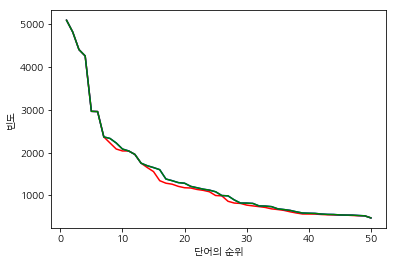

In [87]:
x = range(1, 51)
y = [pair[1] for pair in freqTagged.most_common(50)]   # tuple(단어, 품사)
yy = [pair[1] for pair in freqWord.most_common(50)]   # 단어
yyy = [pair[1] for pair in freqTokens.most_common(50)]   # 단어

plt.plot(x, y, "r-")
plt.plot(x, yy, "b-")
plt.plot(x, yyy, "g-")

plt.xlabel("단어의 순위")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

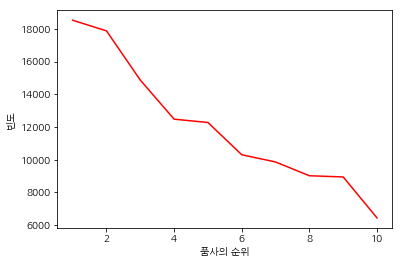

In [88]:
xx = range(1, 11)
yyyy = [pair[1] for pair in freqPos.most_common(10)]   # 품사

plt.plot(xx, yyyy, "r-")
plt.xlabel("품사의 순위")
plt.ylabel("빈도")

### 한글 POS Tagging

In [89]:
from konlpy.tag import Hannanum   # 한나눔

In [90]:
obj = Hannanum()

In [91]:
sentence = "내 우리 그 이 나는 친구는 잠을 많이 잔다."
obj.morphs(sentence)   # 문법적으로 의미 있는 최소한의 단위로 나눔 (띄어쓰기 단위 보다 많아짐. 영어에서와 다름)

['내', '우리', '그', '이', '나', '는', '친구', '는', '잠', '을', '많', '이', '자', 'ㄴ다', '.']

In [92]:
obj.pos(sentence)
# obj.tagset   # 전체 tag set
# obj.tagset["P"]    # P(용언) : 동사

[('내', 'N'),
 ('우리', 'N'),
 ('그', 'M'),
 ('이', 'M'),
 ('나', 'N'),
 ('는', 'J'),
 ('친구', 'N'),
 ('는', 'J'),
 ('잠', 'N'),
 ('을', 'J'),
 ('많', 'P'),
 ('이', 'X'),
 ('자', 'P'),
 ('ㄴ다', 'E'),
 ('.', 'S')]

In [93]:
obj.nouns(sentence)   # 명사

['내', '우리', '나', '친구', '잠']

In [94]:
from konlpy.tag import Kkma   # 꼬꼬마 (서울대)

In [95]:
sentence = "내 우리 그 이 나는 친구는 잠을 많이 잔다."

obj = Kkma()
obj.morphs(sentence)
obj.pos(sentence) 
#obj.nouns(sentence) 

[('내', 'NP'),
 ('우리', 'NP'),
 ('그', 'MDT'),
 ('이', 'NNG'),
 ('나', 'VV'),
 ('는', 'ETD'),
 ('친구', 'NNG'),
 ('는', 'JX'),
 ('잠', 'NNG'),
 ('을', 'JKO'),
 ('많이', 'MAG'),
 ('자', 'VV'),
 ('ㄴ다', 'EFN'),
 ('.', 'SF')]

- P(용언, 동사)를 Kkma가 더 정확히 분석해줌. Hannanum은 용언이 2개로 잘못 분석되어 있음

In [96]:
from konlpy.tag import Komoran   # 코모란

In [97]:
sentence = "내 우리 그 이 나는 친구는 잠을 많이 잔다."

obj = Komoran()
obj.morphs(sentence)
obj.pos(sentence) 
#obj.nouns(sentence) 

[('내', 'NP'),
 ('우리', 'NP'),
 ('그', 'MM'),
 ('이', 'MM'),
 ('나', 'NP'),
 ('는', 'JX'),
 ('친구', 'NNG'),
 ('는', 'JX'),
 ('잠', 'NNG'),
 ('을', 'JKO'),
 ('많이', 'MAG'),
 ('자', 'VV'),
 ('ㄴ다', 'EF'),
 ('.', 'SF')]

In [98]:
from konlpy.tag import Okt   # twitter

In [99]:
sentence = "내 우리 그 이 나는 친구는 잠을 많이 잔다."

obj = Okt()
obj.morphs(sentence)
obj.pos(sentence) 
#obj.nouns(sentence) 

[('내', 'Noun'),
 ('우리', 'Noun'),
 ('그', 'Noun'),
 ('이', 'Noun'),
 ('나', 'Noun'),
 ('는', 'Josa'),
 ('친구', 'Noun'),
 ('는', 'Josa'),
 ('잠', 'Noun'),
 ('을', 'Josa'),
 ('많이', 'Adverb'),
 ('잔다', 'Verb'),
 ('.', 'Punctuation')]

### 한글 형태소 분석기 성능 비교

- 형태소 분리 성능 : Kkma = Komoran = Okt > Hannanum
- 품사 분석 성능 : Kkma = Komoran = Okt > Hannanum
- 명사 분석 성능 : 
    - Kkma = Komoran = Okt => 대명사 포함(모든 명사)
    - Hannanum => 명사에 대명사 제외

### 국립국어원 세종21 : 말뭉치 검색 기능

- https://ithub.korean.go.kr/user/corpus/corpusSearchManager.do

- 특정 단어를 검색해서(예: "친구"), 검색 결과를 하나를 선택(예:고향친구) 하면, 문맥정보와 형테/형태의미 정보를 제공해줌<br>

  [문맥정보]<br>
   이전 문장 :	고향 벌교로 내려가 있던 그때 남편이 나타났다.<br>
   현재 문장 :	구해지지 않는 직장을 구하느니 고향친구 경자가 시집가느라 내놓은 인조꽃가게를 돈벌면 갚기로 하고 우선 넘겨받았다.<br>
   다음 문장 :	경자는 고등학교 다닐 때부터 저 혼자 사모하던 담임선생이 상처를 하자 옳다구나, 딴생각할 것도 없이 바로 그 자리에 들어앉았다.<br>
   [형태/형태의미 정보]<br>
   
| 형태 | 형태의미 |
|:------:|:----------:|
|구해지지|	구하/VV+아/EC+지/VX+지/EC|
|않는|	않/VX+는/ETM|
|직장을|	직장/NNG+을/JKO|
|구하느니|	구하/VV+느니/EC|
|고향친구|	고향/NNG+친구/NNG|
|경자가|	경자/NNP+가/JKS|
|시집가느라|	시집가/VV+느라/EC|
|내놓은|	내놓/VV+은/ETM|
|인조꽃가게를|	인조/NNP+꽃/NNG+가게/NNG+를/JKO|
|돈벌면|	돈/NNG+벌/VV+면/EC|
|갚기로|	갚/VV+기/ETN+로/JKB|
|하고|	하/VV+고/EC|
|우선|	우선/MAG|
|넘겨받았다.|	넘겨받/VV+았/EP+다/EF+./SF|


In [100]:
# 헌법 법전
from konlpy.corpus import kolaw

In [101]:
corpus = kolaw.open(kolaw.fileids()[0]).read()
tokens = Kkma().pos(corpus)

In [102]:
len(word_tokenize(corpus)), len(tokens), tokens[0]   # POS tagging 후 말뭉치가 더 커졌음

(4640, 10053, ('대한민국', 'NNG'))

In [103]:
rawList = FreqDist()
pairList = FreqDist()
wordList = FreqDist()
posList = FreqDist()

for term in word_tokenize(corpus):
    rawList[term] += 1
    
for pair in tokens:
    pairList[pair] += 1
    wordList[pair[0]] += 1
    posList[pair[1]] += 1

In [104]:
len(rawList), len(pairList), len(wordList), len(posList)

(2023, 1294, 1247, 38)

Text(0, 0.5, '빈도')

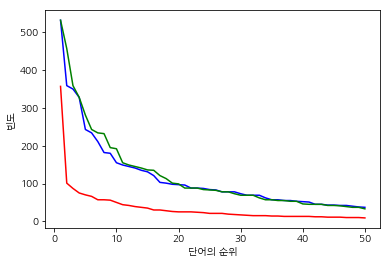

In [105]:
x = range(1, 51)
y = [pair[1] for pair in rawList.most_common(50)]  
yy = [pair[1] for pair in pairList.most_common(50)]   
yyy = [pair[1] for pair in wordList.most_common(50)]   
yyyy = [pair[1] for pair in posList.most_common(50)]   

plt.plot(x, y, "r-")
plt.plot(x, yy, "b-")
plt.plot(x, yyy, "g-")
#plt.plot(x, yyy, "k--")

plt.xlabel("단어의 순위")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

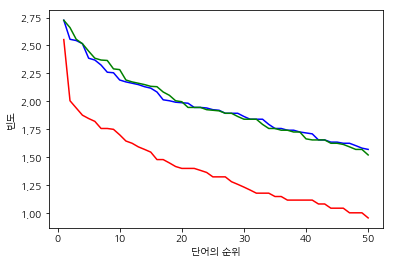

In [106]:
# log scale로 그리면 더 선형적으로 보임 (blue, green이 red 보다 더 일반화 되어 있음을 알 수 있음)
import math

x = range(1, 51)
_y = [math.log10(_) for _ in y]
_yy = [math.log10(_) for _ in yy]
_yyy = [math.log10(_) for _ in yyy]

plt.plot(x, _y, "r-")
plt.plot(x, _yy, "b-")
plt.plot(x, _yyy, "g-")

plt.xlabel("단어의 순위")
plt.ylabel("빈도")

### naver 뉴스 기사 POS tagging

Text(0, 0.5, '빈도')

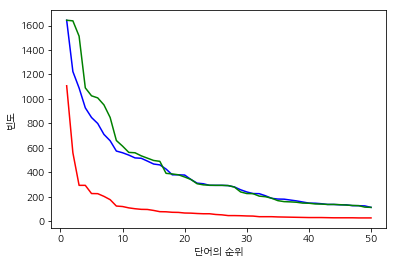

In [107]:
import os

# 뉴스 기사 읽어오기
path = "naver_news/2019-03-20_02-07"
corpus = ""
for file in [_ for _ in os.listdir(path) if _.endswith(".txt")]:
    with open("{0}/{1}".format(path, file), encoding="utf8") as fp:
        corpus += fp.read()

# word tokenize
rawList = FreqDist()
for term in word_tokenize(corpus):
    rawList[term] += 1

# Kkma POS tagging
tokens = Kkma().pos(corpus)

pairList = FreqDist()
wordList = FreqDist()
posList = FreqDist()

for pair in tokens:
    pairList[pair] += 1
    wordList[pair[0]] += 1
    posList[pair[1]] += 1
    
# 그래프 그리기
x = range(1, 51)
y = [pair[1] for pair in rawList.most_common(50)]  
yy = [pair[1] for pair in pairList.most_common(50)]   
yyy = [pair[1] for pair in wordList.most_common(50)]   
#yyyy = [pair[1] for pair in posList.most_common(50)]   

plt.plot(x, y, "r-")
plt.plot(x, yy, "b-")
plt.plot(x, yyy, "g-")
#plt.plot(x, yyy, "k--")

plt.xlabel("단어의 순위")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

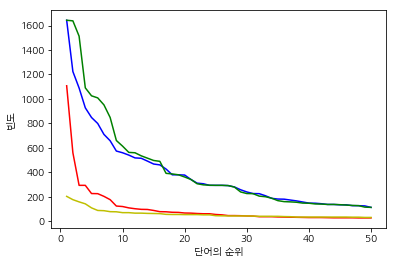

In [133]:
# 음절 단위 Ngram 사용해보기
ngramList = FreqDist()

for term in word_tokenize(corpus):
    for token in ngramUmjeol(term):
        ngramList[term] += 1
        
# 그래프 그리기
ngram_y = [pair[1] for pair in ngramList.most_common(50)]  
ngram_yy = [math.log10(_) for _ in ngram_y]

plt.plot(x, y, "r-")
plt.plot(x, yy, "b-")
plt.plot(x, yyy, "g-")
plt.plot(x, ngram_y, "y-")

plt.xlabel("단어의 순위")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

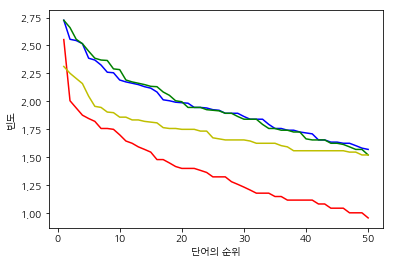

In [134]:
plt.plot(x, _y, "r-")
plt.plot(x, _yy, "b-")
plt.plot(x, _yyy, "g-")
plt.plot(x, ngram_yy, "y-")

plt.xlabel("단어의 순위")
plt.ylabel("빈도")

### 한글 POS taggers 비교

- Mecab이 성능이 가장 좋지만, windows 지원 안함
- POS Taggers 비교

![pos_taggers](./images/POS_tagger_비교.png)

## Collocations

- A sequence of words or terms
- co-occur more often than would be expected by chance
- frequency counting, Pointwise Mutual Information(PMI), hypothesis testing(t-test and chi-square), ...

![collocations](./images/collocations.png)

In [109]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder   # 어절 단위 2개의 쌍을 찾음
from nltk.corpus import gutenberg

In [110]:
from nltk.tokenize import word_tokenize

In [111]:
corpus = gutenberg.open(gutenberg.fileids()[0]).read()
tokens = word_tokenize(corpus)

In [113]:
bigram = BigramCollocationFinder.from_words(tokens)
bigram.nbest(BigramAssocMeasures().pmi, 10)

[('26th', 'ult.'),
 ('Abominable', 'scoundrel'),
 ('Agricultural', 'Reports'),
 ('Austen', '1816'),
 ('Baronne', "d'Almane"),
 ('Candles', 'everywhere.'),
 ('Clayton', 'Park'),
 ('Comtesse', "d'Ostalis"),
 ('DEAR', 'MADAM'),
 ('Farmer', 'Mitchell')]

In [114]:
bigram.nbest(BigramAssocMeasures().chi_sq, 10)

[('&', 'c.'),
 ('10,000', 'l.'),
 ('26th', 'ult.'),
 ('Abominable', 'scoundrel'),
 ('Agricultural', 'Reports'),
 ('Austen', '1816'),
 ('Baronne', "d'Almane"),
 ('Candles', 'everywhere.'),
 ('Clayton', 'Park'),
 ('Comtesse', "d'Ostalis")]

In [143]:
# 형태소 분석기로 token 만들기
from nltk import pos_tag

corpus = gutenberg.open(gutenberg.fileids()[0]).read()
#tokens = [row for row in pos_tag(word_tokenize(corpus))]
tokens = [row[0] for row in pos_tag(word_tokenize(corpus))]

bigram = BigramCollocationFinder.from_words(tokens)
print(bigram.nbest(BigramAssocMeasures().pmi, 10))
print(bigram.nbest(BigramAssocMeasures().chi_sq, 10))

[('26th', 'ult.'), ('Abominable', 'scoundrel'), ('Agricultural', 'Reports'), ('Austen', '1816'), ('Baronne', "d'Almane"), ('Candles', 'everywhere.'), ('Clayton', 'Park'), ('Comtesse', "d'Ostalis"), ('DEAR', 'MADAM'), ('Farmer', 'Mitchell')]
[('&', 'c.'), ('10,000', 'l.'), ('26th', 'ult.'), ('Abominable', 'scoundrel'), ('Agricultural', 'Reports'), ('Austen', '1816'), ('Baronne', "d'Almane"), ('Candles', 'everywhere.'), ('Clayton', 'Park'), ('Comtesse', "d'Ostalis")]


In [137]:
# 형태소 분석기로 token 만들기
result = pos_tag(word_tokenize(corpus))
tokens = [row[0] for row in result if len(row[0]) > 2]   # 짧은 글자 처리

bigram = BigramCollocationFinder.from_words(tokens)
print(bigram.nbest(BigramAssocMeasures().pmi, 10))
print(bigram.nbest(BigramAssocMeasures().chi_sq, 10))

[("'K팝", '경정에게'), ("'MWC", "2019'에서"), ("'No", '서울경제를'), ("'fn파스'▶", '속보이는'), ("'그것", '공통된'), ("'길고", '물체에'), ("'김정은", '수석대변인'), ("'김학의ㆍ장자연", '진상조사'), ("'깜짝", '출시됐다가'), ("'깡통전세", '문제의')]
[("'K팝", '경정에게'), ("'MWC", "2019'에서"), ("'No", '서울경제를'), ("'fn파스'▶", '속보이는'), ("'그것", '공통된'), ("'길고", '물체에'), ("'김정은", '수석대변인'), ("'김학의ㆍ장자연", '진상조사'), ("'깜짝", '출시됐다가'), ("'깡통전세", '문제의')]


In [138]:
# 한글에 적용
corpus = kolaw.open(kolaw.fileids()[0]).read()

tokens = [pair[0] for pair in Kkma().pos(corpus)]

bigram = BigramCollocationFinder.from_words(tokens)
print(bigram.nbest(BigramAssocMeasures().pmi, 10))
print(bigram.nbest(BigramAssocMeasures().chi_sq, 10))

[('가부', '동수'), ('강제', '노역'), ('경자', '유전'), ('공무', '담임'), ('공중', '도덕'), ('과반', '수가'), ('교전', '상태'), ('기본적', '인권'), ('노인과', '청소년'), ('다수', '표')]
[('가부', '동수'), ('강제', '노역'), ('경자', '유전'), ('공무', '담임'), ('공중', '도덕'), ('과반', '수가'), ('교전', '상태'), ('기본적', '인권'), ('내부', '규율'), ('노인과', '청소년')]


In [139]:
# 뉴스 기사 읽어오기
path = "naver_news/2019-03-20_02-07"
corpus = ""
for file in [_ for _ in os.listdir(path) if _.endswith(".txt")]:
    with open("{0}/{1}".format(path, file), encoding="utf8") as fp:
        corpus += fp.read()

# tokens = [pair[0] for pair in Kkma().pos(corpus)]
result = pos_tag(word_tokenize(corpus))
tokens = [row[0] for row in result if len(row[0]) > 1]   # 짧은 글자 처리

bigram = BigramCollocationFinder.from_words(tokens)
print(bigram.nbest(BigramAssocMeasures().pmi, 10))
print(bigram.nbest(BigramAssocMeasures().chi_sq, 10))

[("'K팝", '공연'), ("'MWC", "2019'에서"), ("'fn파스'▶", '속보이는'), ("'갤럭시", '버즈'), ("'그것", '공통된'), ("'김정은", '수석대변인'), ("'깜짝", '출시됐다가'), ("'깡통전세", '문제의'), ("'대왕젤리'라는", '애칭이'), ("'도넛", '탱크')]
[("'K팝", '공연'), ("'MWC", "2019'에서"), ("'fn파스'▶", '속보이는'), ("'갤럭시", '버즈'), ("'그것", '공통된'), ("'김정은", '수석대변인'), ("'깜짝", '출시됐다가'), ("'깡통전세", '문제의'), ("'뉴스APP", '이슈부터'), ("'대만", '대왕젤리')]
